In [2]:
import numpy as np

data = np.load('../data/flowers_224.npz')
x = data.files[0]
x = data[x]
y = data.files[1]
y = data[y]

In [3]:
from math import sqrt
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
image = x[456]
image2 = x[302]
image3 = x[320]

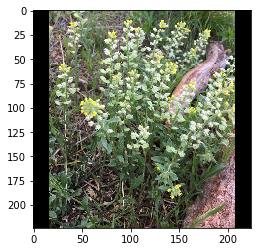

In [27]:
plt.imshow(image2)

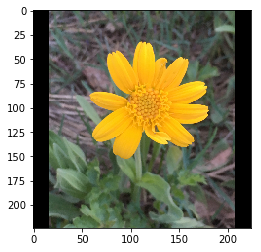

In [10]:
plt.imshow(image)

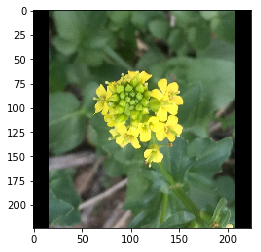

In [29]:
plt.imshow(image3)

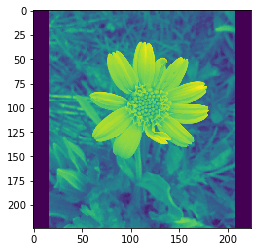

In [31]:
image_gray = rgb2gray(image)
plt.imshow(image_gray)

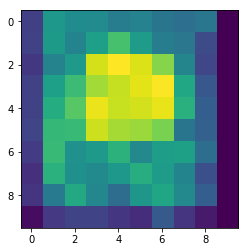

In [36]:
from skimage.transform import downscale_local_mean

downscaled = downscale_local_mean(image_gray, (24, 24))
downscaled.shape
plt.imshow(downscaled)

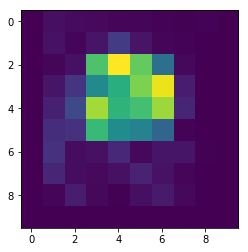

In [37]:
from skimage.exposure import adjust_gamma
gamma_adjusted = adjust_gamma(downscaled, 5)
plt.imshow(gamma_adjusted)

In [ ]:
bw = closing(gamma_adjusted > thresh, square(1))

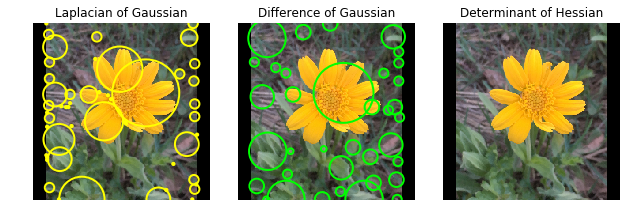

In [27]:
from skimage.transform import downscale_local_mean

downscale_local_mean(image_gray, (16, 16))

blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)
# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image, interpolation='nearest')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()
plt.tight_layout()
plt.show()


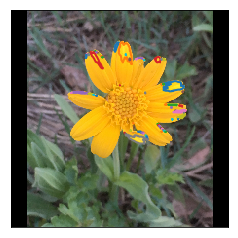

In [28]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import measure

# Find contours at a constant value of 0.8
contours = measure.find_contours(image_gray, 0.8)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(image, interpolation='nearest', cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()


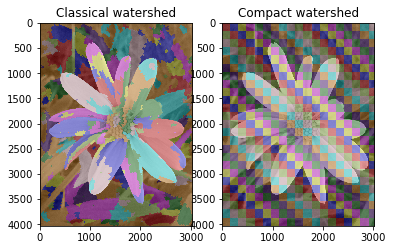

In [30]:
from skimage import data, util, filters, color, io
from skimage.morphology import watershed
import matplotlib.pyplot as plt

img = io.imread('../imgs_jpgs/arnica_cordifolia_75.jpg')
img_gray = rgb2gray(img)


edges = filters.sobel(img_gray)

grid = util.regular_grid(img_gray.shape, n_points=468)

seeds = np.zeros(img_gray.shape, dtype=int)
seeds[grid] = np.arange(seeds[grid].size).reshape(seeds[grid].shape) + 1

w0 = watershed(edges, seeds)
w1 = watershed(edges, seeds, compactness=0.01)

fig, (ax0, ax1) = plt.subplots(1, 2)

ax0.imshow(color.label2rgb(w0, img_gray))
ax0.set_title('Classical watershed')

ax1.imshow(color.label2rgb(w1, img_gray))
ax1.set_title('Compact watershed')

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.segmentation import random_walker
from skimage.data import binary_blobs
from skimage.exposure import rescale_intensity
import skimage

data = img_gray

# The range of the binary image spans over (-1, 1).
# We choose the hottest and the coldest pixels as markers.
markers = np.zeros(data.shape, dtype=np.uint)
markers[data < -0.95] = 1
markers[data > 0.95] = 2

# Run random walker algorithm
labels = random_walker(data, markers, beta=10, mode='bf')

# Plot results
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 3.2),
                                    sharex=True, sharey=True)
ax1.imshow(data, cmap='gray', interpolation='nearest')
ax1.axis('off')
ax1.set_adjustable('box-forced')
ax1.set_title('Noisy data')
ax2.imshow(markers, cmap='magma', interpolation='nearest')
ax2.axis('off')
ax2.set_adjustable('box-forced')
ax2.set_title('Markers')
ax3.imshow(labels, cmap='gray', interpolation='nearest')
ax3.axis('off')
ax3.set_adjustable('box-forced')
ax3.set_title('Segmentation')

fig.tight_layout()
plt.show()